# Tutorial: Fermi GBM Localizations and Skymaps

Adapted from "GBM Localizations and Skymaps" in the Fermi GBM Data Tools documentation and "Fermi GBM Localizations" in the Fermi Gamma-ray Data Tools documentation.

As part of mission operations, GBM produces localizations for GRBs and disseminates these to the community. GCN notices are sent to interested follow-up observers containing brief summary information, and HEALPix FITS files containing the localization are created and hosted at the Fermi Science Support Center. These localizations contain the best-modeled systematic uncertainty in the localization and contain a host of metadata such as the individual detector pointings and the geocenter location as observed by Fermi.

In this tutorial, we will go through an example of how to use the Fermi Gamma-Ray Tools (GDT) toolkit as well as the core GDT toolkit to access localizations for gamma-ray bursts and to plot skymaps, both of the localizations and of other known points, using HEALPix files from the Fermi Gamma-ray Burst Monitor.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import gdt.missions.fermi 
import gdt.core 

First we need to download and open our HEALPix data. Since HEALPix files are associated with triggered data, not continuous data, we can use the `TriggerFtp` class from the GDT Fermi toolkit to find and download the data we need. We can then read and open our HEALPix files using the `GbmHealPix` class from the same toolkit. We will use data from event **190915240** as our example data for the rest of this tutorial.

In [24]:
from gdt.missions.fermi.gbm.finders import TriggerFtp
from gdt.missions.fermi.gbm.localization import GbmHealPix
from gdt.core import data_path

# initialize the trigger data finder to pull from event 190915240
healpix_finder = TriggerFtp('190915240')

# download and open healpix localization data for the event
healpix_finder.get_healpix(download_dir=data_path.joinpath('190915240'))
filepath = data_path.joinpath('190915240/glg_healpix_all_bn190915240_v00.fit')
loc = GbmHealPix.open(filepath)
print(loc)

Output()

<GbmHealPix: glg_healpix_all_bn190915240_v00.fit
 NSIDE=128; trigtime=590219102.911008;
 centroid=(48.8671875, 4.181528273111476)>


We can easily access some of the HEALPix-specific info, such as the resolution, the number of pixels in the HEALPix map, and the area of each pixel, like so:

In [25]:
# the healpix resolution
print('Healpix nside: {}'.format(loc.nside))

# the number of pixels in the healpix map
print('Healpix npix: {}'.format(loc.npix))

# the area of each pixel in square degrees
print('Pixel area (sq. deg.): {}'.format(loc.pixel_area))

Healpix nside: 128
Healpix npix: 196608
Pixel area (sq. deg.): 0.20982341130279172


As for the localization information, we can retrieve the sky position with the highest probability (centroid) with the `GbmHealPix.centroid` attribute.

In [56]:
# the right ascension and declination of the centroid (sky position with highest probability)
print('Centroid (RA, Dec):',loc.centroid)

Centroid (RA, Dec): (48.8671875, 4.181528273111476)


We can also determine the probability of the localization at a particular point in the sky with the `probability()` method.

In [58]:
# the probability of the localization at right ascension 49.0 and declination 4.0
print('Probability of localization at (49.0, 4.0):',loc.probability(49.0, 4.0))

Probability of localization at (49.0, 4.0): 0.009200396515918592


And if we want to determine the confidence level a particular point on the sky is relative to the localization, we can use the `confidence()` method.

In [59]:
# the localization confidence at right ascension 40.0 and declination 4.0
print('Confidence at (40.0, 4.0):',loc.confidence(40.0, 4.0))

Confidence at (40.0, 4.0): 0.865783539232832


Often for follow-up observations, it’s useful to know how much sky area the localization covers at a some confidence level. This can easily be determined with the `area()` method.

In [61]:
# the sky area contained (in units of square degrees) within a confidence region of 90%
print('Area with 90% confidence:',loc.area(0.9))

Area with 90% confidence: 281.1633711457409


And for plotting or other purposes, we can retrieve the RA and Dec “paths” for a given confidence region using the `confidence_region_path()` method. Note that a confidence region may have many disjoint pieces, so this method will return a list of arrays.

In [30]:
%matplotlib agg

# the bounding path for a confidence region of 50%
loc.confidence_region_path(0.5)

[array([[ 4.61281337e+01,  2.59721684e-01],
        [ 4.53138456e+01,  5.02793296e-01],
        [ 4.51253482e+01,  6.21222158e-01],
        [ 4.43160678e+01,  1.50837989e+00],
        [ 4.41225627e+01,  2.36616334e+00],
        [ 4.40920226e+01,  2.51396648e+00],
        [ 4.38604591e+01,  3.51955307e+00],
        [ 4.38130019e+01,  4.52513966e+00],
        [ 4.41225627e+01,  5.23313031e+00],
        [ 4.43770701e+01,  5.53072626e+00],
        [ 4.50410902e+01,  6.53631285e+00],
        [ 4.51253482e+01,  6.62602574e+00],
        [ 4.61281337e+01,  7.28272773e+00],
        [ 4.66920493e+01,  7.54189944e+00],
        [ 4.71309192e+01,  7.65985809e+00],
        [ 4.81337047e+01,  7.71980664e+00],
        [ 4.91364903e+01,  8.00964739e+00],
        [ 5.01392758e+01,  8.17249974e+00],
        [ 5.11420613e+01,  7.90708921e+00],
        [ 5.21448468e+01,  7.74393795e+00],
        [ 5.25325054e+01,  7.54189944e+00],
        [ 5.31476323e+01,  7.20106255e+00],
        [ 5.41504178e+01,  6.998

We can even determine the probability that a point source at a given location is association with the skymap (as opposed to the null hypothesis of two spatially-unrelated sources) using the `source_probability()` method.

In [77]:
# probability that a point source on the sky is associated with our skymap for (ra,dec) = (50.0,10.0)
print('Probability at (50.0, 10.0):',loc.source_probability(50.0, 10.0))

# probability that a point source on the sky is associated with our skymap for (ra,dec) = (150.0,10.0)
print('Probability at (150.0, 10.0):',loc.source_probability(150.0, 10.0))

Probability at (50.0, 10.0): 0.9873891240856155
Probability at (150.0, 10.0): 4.406012895262379e-15


For extend sky regions, the `region_probability()` method should be used with another HEALPix object to return the probability that the two maps are spatially associated, as opposed to the `source_probability()` method.

We can retrieve, as attributes, various other interesting tidbits, such as the location of the sun, the location and radius of the geocenter, the detector pointings, and the fraction of the localization that is on Earth.

In [72]:
# sun location
print('Sun location (RA, Dec): {}, {}'.format(loc.sun_location.ra, loc.sun_location.dec))

Sun location (RA, Dec): 172.5011935414964 deg, 3.2379721386787352 deg


In [73]:
# geocenter location
print('Geocenter location (RA, Dec): {}, {}'.format(loc.geo_location.ra, loc.geo_location.dec))

Geocenter location (RA, Dec): 319.8312390218318 deg, 17.406129347176748 deg


In [74]:
# geocenter radius
print('Geocenter radius:',loc.geo_radius)

Geocenter radius: 67.30651146974877 deg


In [75]:
# detector n0 pointing
print('Pointing for detector n0 (RA, Dec): {}, {}'.format(loc.n0_pointing.ra, loc.n0_pointing.dec))

Pointing for detector n0 (RA, Dec): 146.59008063626698 deg, 36.968033627046395 deg


In [76]:
# fraction of localization on Earth
print('Fraction of localization on Earth:',loc.geo_probability)

Fraction of localization on Earth: 8.476746e-06


Of course, since we have a HEALPix file, we can make a pretty sky map! We can use the `EquatorialPlot` class from the GDT Core toolkit to easily plot a sky map for our localization data. 

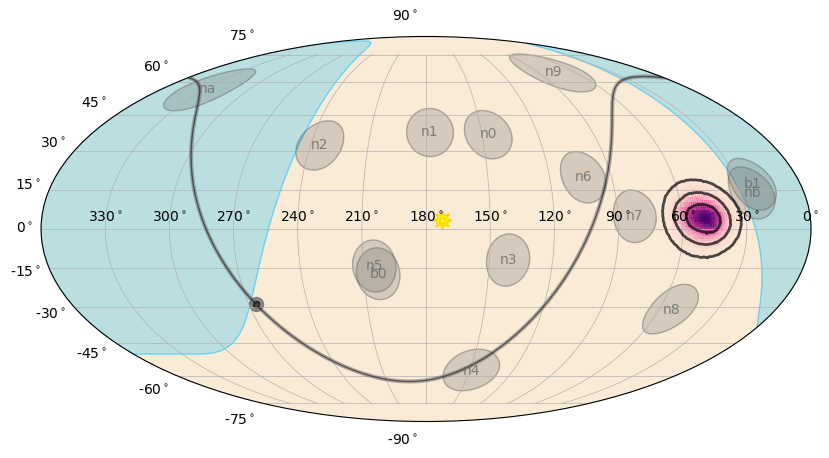

In [38]:
from gdt.core.plot.sky import EquatorialPlot
%matplotlib inline

# initialize
skyplot = EquatorialPlot()

# add our healpix localization
skyplot.add_localization(loc)
plt.show()

By default, the plot shows the localization (purple gradient and black contours), the Earth occultation region (blue), the detector pointings (grey circles), the Galactic Plane (gray/black line), and the sun (yellow smiley-face).

What if we want filled contours instead of a gradient, no Galactic Plane, and only some of the detectors? Also, by default we’re plotting the 1-, 2-, and 3-sigma contours, so we could plot the 50% and 90% contours instead. 

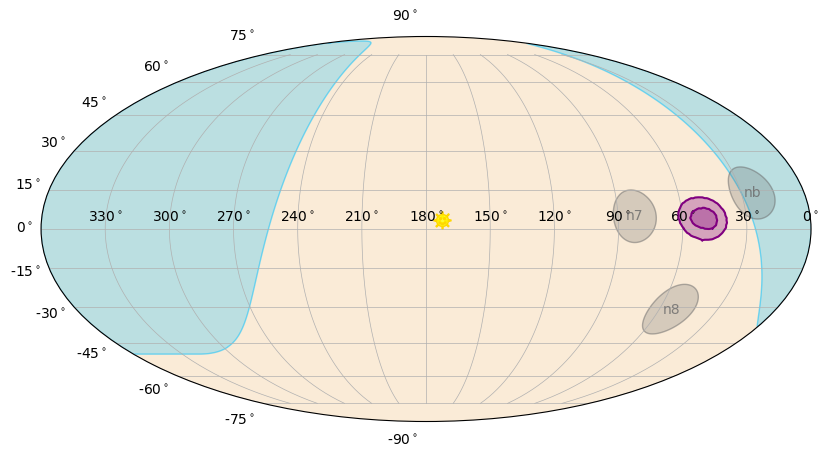

In [42]:
skyplot = EquatorialPlot()

# plot of the localization with different contour levels, no galactic plane, and only three detectors
skyplot.add_localization(loc, gradient=False, clevels=[0.5, 0.9], galactic_plane=False, detectors=['n7', 'n8', 'nb'])
plt.show()

Sometimes localizations will have probability that overlaps the Earth. For primarily historical and logistical reasons, the GBM HEALPix maps don’t remove any probability that falls on the Earth, but you can do that using the `GbmHealPix.remove_earth()` function, which will return you a new `GbmHealPix` object with the probability on the Earth removed.

In addition to reading existing GBM HEALPix maps, you can create your own! For example, let’s create a 10-degree radius Gaussian centered at (RA, Dec) = (180.0, 0.0):

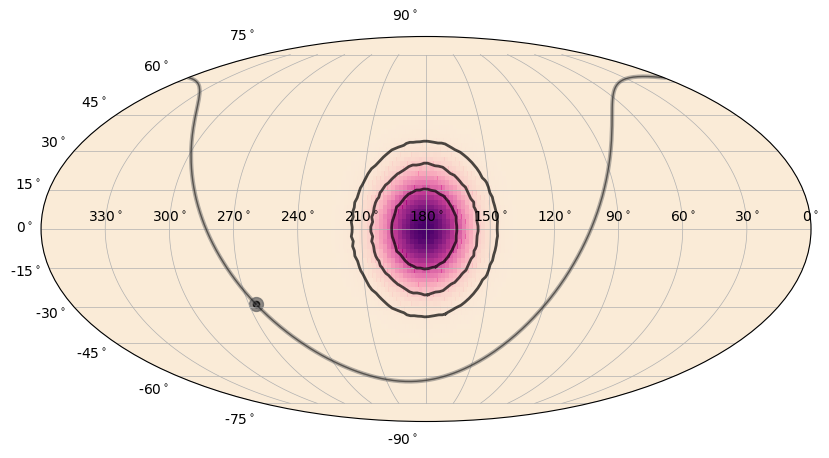

In [44]:
skyplot = EquatorialPlot()

# 10 degree gaussian centered at (ra, dec) = (180.0, 0.0)
gauss_map = GbmHealPix.from_gaussian(180.0, 0.0, 10.0)

# set detectors to empty because we have no detector info to plot
skyplot.add_localization(gauss_map, detectors=[])

We could also create a 3-degree-width annulus on the sky centered at (RA, Dec) = (300.0, -10.0), with radius of 80 degrees:

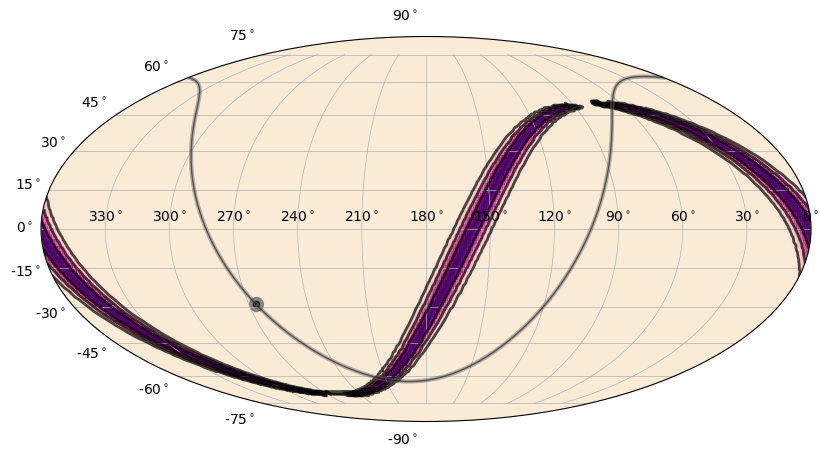

In [45]:
skyplot = EquatorialPlot()

# 3 degree wide annulus with 80 degree radius centered at (ra, dec) = (300, -10)
annulus_map = GbmHealPix.from_annulus(300, -10, 80.0, 3.0)
skyplot.add_localization(annulus_map, detectors=[])

If you only have a list of coordinates and want to plot an equal-probability region on the sky, you can do that as well:

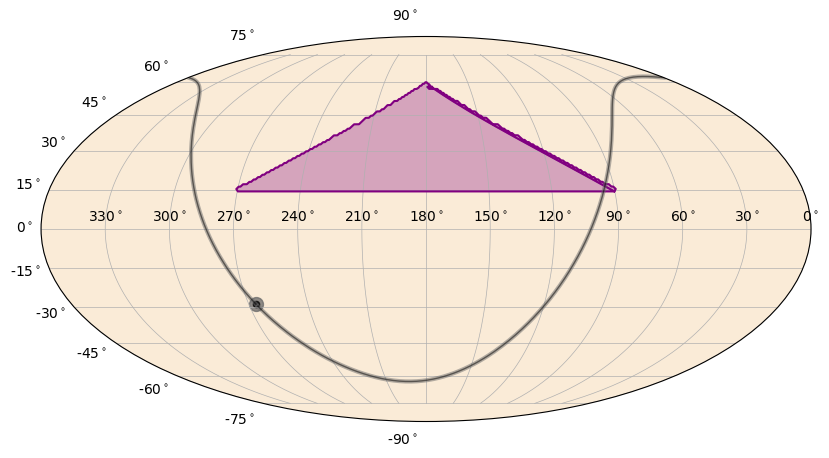

In [50]:
skyplot = EquatorialPlot()

# list of three (ra, dec) coordinates to triangulate
ra_pts = [270.0, 180.0, 90.0]
dec_pts = [15.0, 60.0, 15.0]

# create gbmhealpix object with three points as vertices
verts_map = GbmHealPix.from_vertices(ra_pts, dec_pts, nside=128)

# skyplot of equal-probability region within three vertices
skyplot.add_localization(verts_map, earth=False, sun=False, detectors=[], gradient=False, clevels=[0.999])

You can even convolve your map with a Gaussian or a model that is built out of Gaussians:

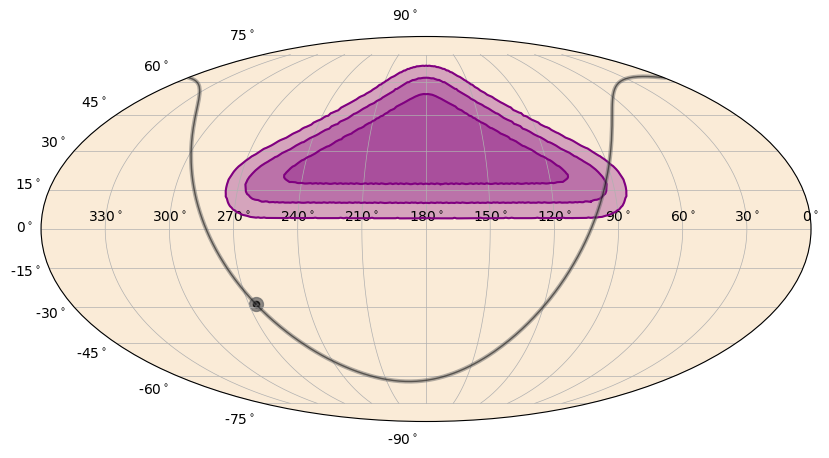

In [54]:
skyplot = EquatorialPlot()

# a single gaussian of sigma_deg radius
def gauss_model(sigma_deg):
    sigma = np.deg2rad(sigma_deg)
    return ([sigma],[1.0])

# convolved with a 5 degree radius gaussian
verts_convolved = verts_map.convolve(gauss_model, 5.0)
skyplot.add_localization(verts_convolved, gradient=False, detectors=[])

And finally, you can multiply maps together to produce a combined sky map like so:

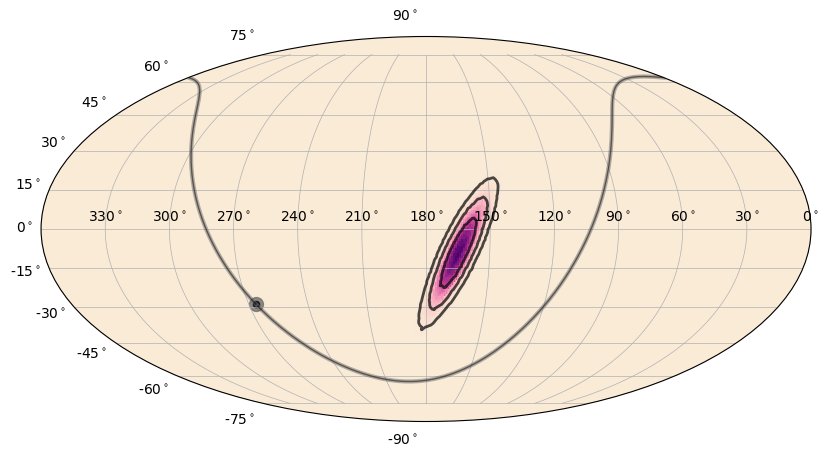

In [53]:
skyplot = EquatorialPlot()

# multiply the gaussian map with the annulus map
multiplied = GbmHealPix.multiply(gauss_map, annulus_map)
skyplot.add_localization(multiplied, detectors=[])

Congratulations, you've completed the lesson on localizations and sky maps!